In [1]:
!git clone https://github.com/ChaitaliV/Objective-criterias-to-quantify-the-accuracy-of-explanation

Cloning into 'Objective-criterias-to-quantify-the-accuracy-of-explanation'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 401 (delta 12), reused 3 (delta 3), pack-reused 376
Receiving objects: 100% (401/401), 24.32 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (195/195), done.
Updating files: 100% (34/34), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('Objective-criterias-to-quantify-the-accuracy-of-explanation/dd_classification')

In [5]:
!pip install tensorflow-text
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 40.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.3 MB/s eta 0:00:00


In [16]:
from utils import *
from model import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [11]:
model_path = '/content/drive/MyDrive/model'

In [8]:
# load all test data
x_test,y_test = load_pkl_data(test_pkl)
print("%d Validation Data loaded"%(len(x_test)))

203 Validation Data loaded


In [9]:
# load label maps
label2ind = load_dict_from_json(label2ind_json)
ind2label = load_dict_from_json(ind2label_json)
print("Labels loaded")
nc = len(label2ind.keys())
print("Total %d classes"%nc)

Labels loaded
Total 2 classes


In [10]:
model = AttentionClassifier(nc)
print("Model created")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'bert.embeddings.position_ids', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

Model created


In [12]:
model.load_model(model_path)

Model restored weights from /content/drive/MyDrive/model/ckpt-3


In [13]:
# take a random data from test
n_test = len(x_test)
rand_idx = np.random.randint(0,n_test)
print("Random Index %d"%rand_idx)
test_text = x_test[rand_idx]
test_label = y_test[rand_idx]
print(test_text)
print("Label: %s"%test_label)

Random Index 126
उस समय मैंने फाँसी लेने की कोशिश की थी।
Label: dd


In [14]:
word_attention,label = model.predict_with_explain(test_text,ind2label)
print("Predicted label: %s"%label)
print()
print("Word level attention")
print()
for w in word_attention:
    print(w[0],w[1])

dd
Predicted label: dd

Word level attention

[CLS] 0.0770912617444992
उस 0.08476746827363968
समय 0.08446076512336731
मैंने 0.08396174013614655
फाँसी 0.08363468945026398
लेने 0.08503483235836029
की 0.0851849764585495
कोशिश 0.08517526835203171
की 0.08502750843763351
थी 0.0846957117319107
। 0.08387456834316254
[SEP] 0.0770912617444992


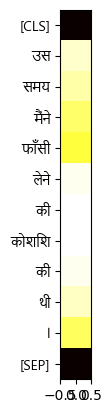

In [18]:
scores = []
words = []
for w,a in word_attention:
    scores.append(a)
    words.append(w)
# scores = np.log(scores)
hindi_font = FontProperties(fname = 'Nirmala.ttf')
plt.imshow(np.expand_dims(scores,1),cmap='hot')
plt.yticks(range(len(words)),words,rotation=0,fontproperties=hindi_font)
plt.show()